---
# Intro to machine learning with scikit-learn

---

In [1]:
# http://scikit-learn.org/stable/install.html
!sudo pip3 install -U scikit-learn

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 11.7MB 122kB/s eta 0:00:01 6% |██                              | 727kB 7.5MB/s eta 0:00:02    50% |████████████████▏               | 5.9MB 12.0MB/s eta 0:00:01    56% |██████████████████              | 6.5MB 12.7MB/s eta 0:00:01    67% |█████████████████████▋          | 7.9MB 14.2MB/s eta 0:00:01    91% |█████████████████████████████▎  | 10.7MB 14.6MB/s eta 0:00:01    97% |███████████████████████████████▏| 11.4MB 11.4MB/s eta 0:00:01


## <u>What is machine learning?</u>

Machine learning (ML) is a method of data analysis that automates analytical model building. Using algorithms that iteratively learn from data, ML allows computers to find hidden insights without being explicitly programmed where to look.

The iterative aspect of ML is important because as models are exposed to new data, they are able to independently adapt. They learn from previous computations to produce reliable, repeatable decisions and results. So in general, ML is about learning to do better in the future based on what was experienced in the past.

ML is a core subarea of artificial intelligence and also intersects broadly with other fields, especially statistics, but also mathematics, physics, theoretical computer science and more.

There are many examples of ML problems:

* optical character recognition: categorize images of handwritten characters by the letters represented
* face detection: find faces in images (or indicate if a face is present)
* spam filtering: identify email messages as spam or non-spam
* topic spotting: categorize news articles (say) as to whether they are about politics, ports, entertainment, etc.
* spoken language understanding: within the context of a limited domain, determine the meaning of something uttered by a speaker to the extent that it can be classified into one of a fixed set of categories
* medical diagnosis: diagnose a patient as a sufferer or non-sufferer of some disease
* customer segmentation: predict, for instance, which customers will respond to a particular promotion
* fraud detection: identify credit card transactions (for instance) which may be fraudulent in nature
* weather prediction: predict, for instance, whether or not it will rain tomorrow


## <u>What are the two main categories of machine learning?</u>

### Supervised learning:
The data comes with additional attributes (called labels) that we want to predict. This problem can be either:

* _**classification**_: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of classification problem would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

* _**regression**_: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

### Unsupervised learning: 

The training data consists of a set of input vectors without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization.


## <u>How does machine learning "work"?</u>

<img src="images/ml.png">

## Machine learning with scikit-learn

The specific software package we will be using to do ML is called [scikit-learn](http://scikit-learn.org). Scikit-learn is a very powerful package that supports a vast array of ML algorithms (regression, classification, clustering, model selection and dimensionality reduction).

In the current lesson we will consider only supervised ML. Remind, it is broken down into two categories, _classification_ and _regression_. In classification, the label is discrete, while in regression, the label is continuous. For example, in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a classification problem: the label is from three distinct categories (classes). On the other hand, we might wish to estimate the age of an object based on such observations: this would be a regression problem, because the label (age) is a continuous quantity.

scikit-learn comes with several toy datasets that are quite useful for getting an intuition for ML (iris, digits, diabetes etc.). All available datasets may be found [here](http://scikit-learn.org/stable/datasets). In this lesson we will consider two datasets - Boston and Iris - and apply regression and classification algorithms to them.

# 1. <u>Boston dataset (regression)</u>

We chose Boston Housing dataset, which contains information about the housing values in suburbs of Boston.

In [1]:
# Import all datasets
from sklearn.datasets import *

# Load Boston Housind data
data_boston = load_boston()
# Get keys of data
print data_boston.keys()

['data', 'feature_names', 'DESCR', 'target']


In [2]:
# Look at the feature names of boston data set
print data_boston.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
# For getting more information about this data we can see the description
print data_boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
# Look at dataset values
print data_boston.data[:2]

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
    9.14000000e+00]]


The Boston dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the `data` key, which is a `n_samples x n_features` array. In the case of supervised problem like this one, one or more response variables (labels) are stored in the `target` key.

For better visualization of the features and target examples we use pandas package, that allow to show data as a DataFrame.

In [5]:
import pandas as pd

# Create a DataFrame with the features
boston = pd.DataFrame(data_boston.data, columns=data_boston.feature_names)

# Show a head of the Data Frame
print "Boston dataset contains {} rows.".format(boston.index.size)
boston.head()

Boston dataset contains 506 rows.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


Boston's target contains the housing prices. Let's add column with it.

In [6]:
print data_boston.target[:10]

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9]


In [7]:
# Add column "Price"
boston["PRICE"] = data_boston.target

# Display first 3 rows
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## <span style="color: blue">Linear regression</span>

The predicting the Boston housing prices is a Regression problem. So, we have chosen the [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) provided by scikit-learn.

Linear regression is the oldest and most widely used predictive model in the field of ML. The goal is to  minimize the sum of the squared errors to fit a straight line to a set of data points - sum of green distances between blue (train) points and red straight line (line of linear regression) on the picture below (note, we have shown only a few such distances): 

<img src="images/linear_regression.png" width="50%">

You can find further information at [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression).

The linear regression model fits a linear function to a set of data points. The form of the function is:

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + … + \beta_nX_n$$
or 
$$Y = \beta_0 + \sum_{i=1}^{n}\beta_i X_i,$$

where $Y$ is the target variable and $X_1, X_2, ..., X_n$ are the predictor variables and $\beta_1, \beta_2, ..., \beta_n$ are the regression coefficients (also known as weights), $\beta_0$ is constant. 

Weights are the solution of the equation system:

$$\sum_{k=1}^{N}\left(Y_k - \beta_0 + \beta_1X_{1k} + \beta_2X_{2k} + … + \beta_nX_{nk}\right)^2 \rightarrow \min$$
or
$$\frac{\partial}{\partial X_i}\sum_{k=1}^{N}\left(\bar Y_k - \beta_0 + \sum_{i=1}^{n}\beta_i \bar X_{ik}\right)^2 = 0,$$

where $\bar{Y}_k$ and $\bar{X}_{ik}$ are real (train) values of target variable and predictors respectivelly.

First, we will import linear regression from scikit-Learn module and than store this object in a variable `lr`.

In [8]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression model
lr = LinearRegression()
print lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


LinearRegression contains many methods, such as (note, these methods are common for the most of algorithms in scikit-learn):

* `decision_function(X)` - decision function of the linear model   
* `fit(X, y)` - fit linear model   
* `get_params()` - get parameters for this estimator    
* `predict(X)` - predict using the linear model    
* `score(X, y)` - returns the coefficient of determination R^2 of the prediction

### a. Fitting a linear model

In [9]:
# Fit Linear Regression
X = data_boston.data
Y = data_boston.target

print lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [10]:
# Let's look at the intercept and number of coefficients
print "Intercept coefficient:",  lr.intercept_
print "Number of coefficients:",  len(lr.coef_)

Intercept coefficient: 36.4911032804
Number of coefficients: 13


So, it means, that for each feature we have found one coefficient. Let's see

In [11]:
pd.DataFrame(zip(boston.columns[:-1], lr.coef_), columns = ["features", "coefficients"])

,features,coefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


As you can see from the data frame that there is a high correlation between RM (that means average numbers of rooms per dwelling) and prices and NOX (nitric oxides concentration) and prices.

Lets plot a scatter plot between True housing prices and True RM and NOX.

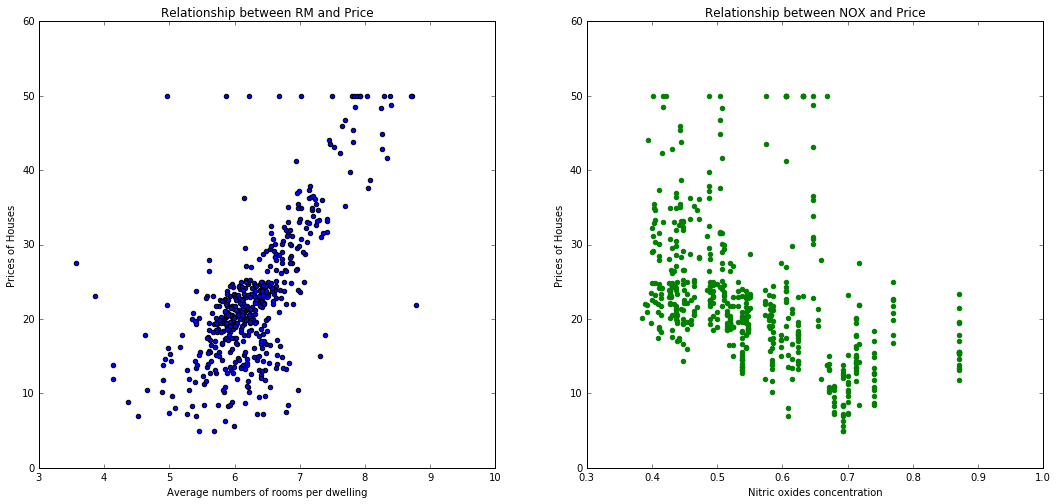

In [12]:
# Import matplotlib library
%matplotlib inline
import matplotlib.pyplot as plt

# Set plot's width and height
plt.rcParams['figure.figsize'] = (18.0, 8.0)

# Plot for RM distribution
plt.subplot(1,2,1)
# Name the axis
plt.xlabel("Average numbers of rooms per dwelling")
plt.ylabel("Prices of Houses")
# Define title
plt.title("Relationship between RM and Price")
# Plot
plt.scatter(boston.RM, boston.PRICE)

# Plot for NOX distribution
plt.subplot(1,2,2)
plt.xlabel("Nitric oxides concentration")
plt.ylabel("Prices of Houses")
plt.title("Relationship between NOX and Price")
plt.scatter(boston.NOX, boston.PRICE, color='g')

plt.show()

As you can see that there is a positive correlation between RM and housing prices and negative - between NOX and prices.

### b. Predicting prices

To predict prices we will use `lr.predict()` function.

In [13]:
# Predict the prices
Y_p = lr.predict(X)

# Print the prices of the first 10 houses
print Y_p[:10]

[ 30.00821269  25.0298606   30.5702317   28.60814055  27.94288232
  25.25940048  23.00433994  19.5347558   11.51696539  18.91981483]


Let's now plot a difference between the right prices and the predicted prices.

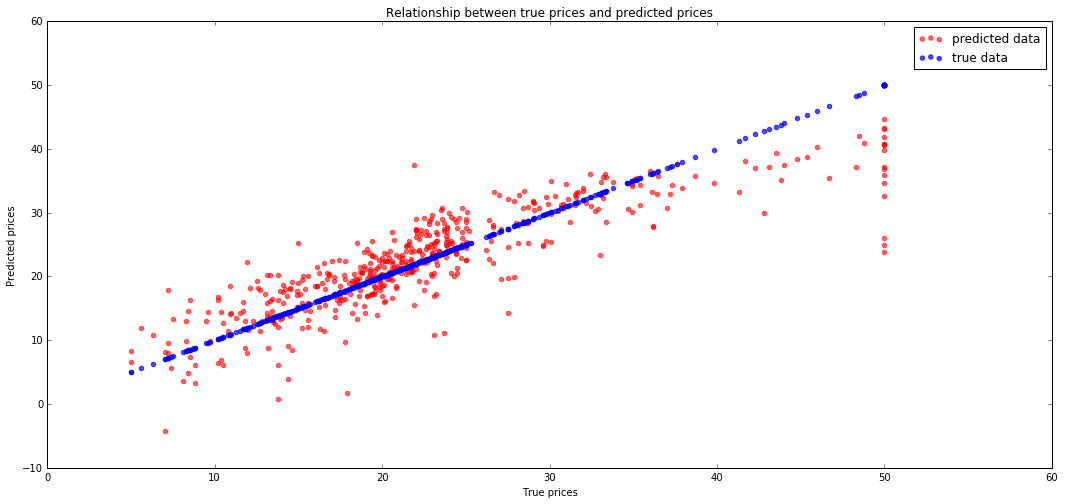

In [14]:
plt.xlabel("True prices")
plt.ylabel("Predicted prices")

plt.title("Relationship between true prices and predicted prices")

plt.scatter(Y, Y_p, color='r', label='predicted data', alpha=0.6)
plt.scatter(Y, Y, color='b', label='true data', alpha=0.7)
plt.legend()
plt.show()

We can see here some errors. Let's calculate the Mean Squared Error.

In [15]:
import numpy as np

# Calculate mse
print np.mean((Y - Y_p)**2)

21.8977792177


### c. Training and test data sets

This code will tell us how well the model does on explaining the data we used to fit the model.

In ML, we focus on model performance on unseen data. In order to estimate the performance of the system on unseen data, we can split the data into two sets: the training set and the test set.

The following code will fit a model just using the training data and print out the coefficient of determination for both the training and testing data

In [16]:
# Import function for splitting arrays or matrices into random train and test subsets
from sklearn.cross_validation import train_test_split

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, Y)

# Show the size of each data 
print "X.shape:", X.shape
print "Y.shape:", Y.shape
print "X_train.shape:", X_train.shape
print "X_test.shape:", X_test.shape
print "y_train.shape:", y_train.shape
print "y_test.shape:", y_test.shape

X.shape: (506, 13)
Y.shape: (506,)
X_train.shape: (379, 13)
X_test.shape: (127, 13)
y_train.shape: (379,)
y_test.shape: (127,)


Build a linear regression model using obtained train/test datasets.

In [17]:
# Fit the model
lr_new = LinearRegression()
lr_new.fit(X_train, y_train)

# Get train prediction
pred_train = lr_new.predict(X_train)

# Get test prediction
pred_test = lr_new.predict(X_test)

As in previous paragraph let's calculate mse for train and test prediction

In [18]:
print "Train MSE:", np.mean((y_train - pred_train)**2)
print "Test MSE:", np.mean((y_test - pred_test)**2)

Train MSE: 20.4833001648
Test MSE: 27.9187182141


Let's show the residual plot using training (blue) and test (red) data.

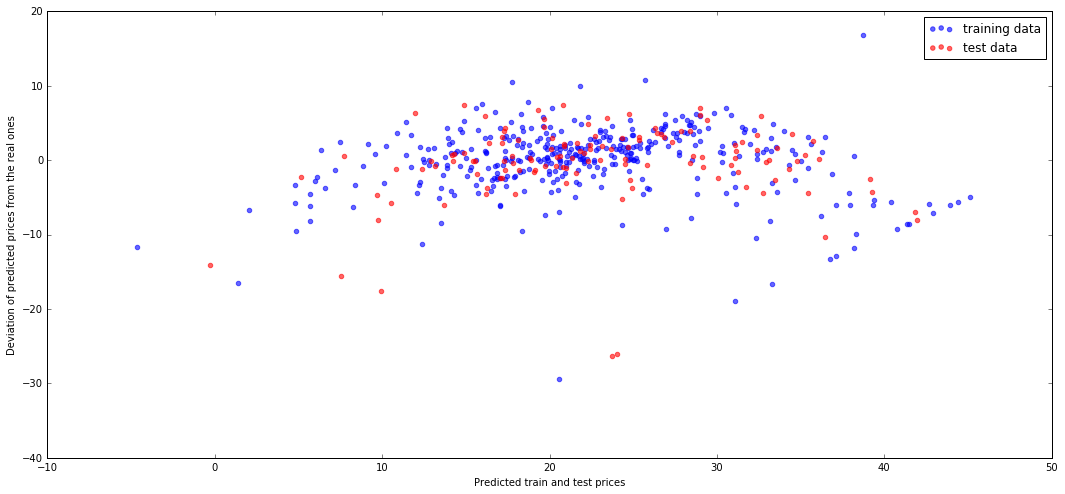

In [19]:
plt.xlabel("Predicted train and test prices")
plt.ylabel("Deviation of predicted prices from the real ones")
 
plt.scatter(pred_train, pred_train-y_train, color = 'b', label="training data", alpha=0.6)
plt.scatter(pred_test, pred_test - y_test, color = 'r', label="test data", alpha=0.6)

plt.legend()
plt.show()

# 2. <u>Iris dataset (classification)</u> 

The Iris dataset is a very simple flower database introduced by Ronald Fisher in 1936. It has 150 observations of the iris flower specifying some measurements: sepal length, sepal width, petal length and petal width together with its subtype: Iris setosa, Iris versicolor, Iris virginica. Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

<img src="images/iris_petal_sepal.png">

Let's display images for each type of iris.

In [20]:
from IPython.core.display import Image, display

display(Image(url='http://www.badbear.com/signa/photos/Iris-setosa-14.jpg', width=400))
print "Iris Setosa\n"

display(Image(url='http://www.badbear.com/signa/photos/Iris-versicolor-1.jpg', width=400))
print "Iris Versicolor\n"

display(Image(url='http://www.badbear.com/signa/photos/Iris-virginica-9.jpg', width=400))
print "Iris Virginica"

Iris Setosa



Iris Versicolor



Iris Virginica


In [21]:
# Load Iris dataset
data_iris = load_iris()

print data_iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [22]:
# Information about the content of Iris dataset is also available
print data_iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [23]:
# Let's look at features and target names
print "feature_names"
print data_iris.feature_names

print "\ntarget_names"
print data_iris.target_names

feature_names
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target_names
['setosa' 'versicolor' 'virginica']


In [24]:
# Let's look at the data in iris dataset
print data_iris.data[:5]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [25]:
# Let's see target values
print data_iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In the Iris dataset we have only three different target values (discrete values 0, 1, 2) unlike to Boston dataset, where target values were distributed continuously. The target value 0 corresponds to Iris Setosa, the number 1 matches with Iris Versicolor and the last number 2 corresponds to Iris Virginica.  

In [26]:
# Create a pandas DataFrame for Iris dataset
iris = pd.DataFrame(data=data_iris.data, columns=data_iris.feature_names)
iris["target"] = data_iris.target
print "Iris dataset contains {} rows.".format(iris.index.size)
iris.head()

Iris dataset contains 150 rows.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Build the scatter plot for all width and length values.

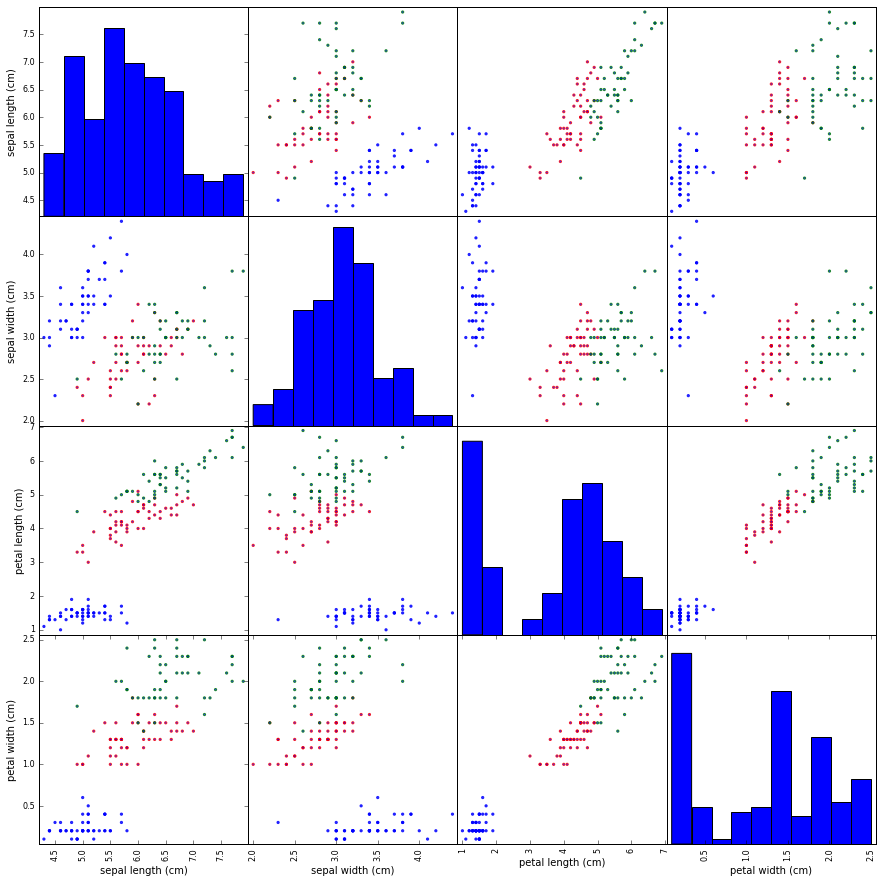

In [27]:
from pandas.tools.plotting import scatter_matrix

# set color for each iris kind
color_dict = {0: "blue",   # Iris Setosa
              1: "red",    # Iris Versicolor
              2: "green"}  # Iris Virginica

colors = iris["target"].map(lambda x: color_dict.get(x))
X = iris.drop('target', axis=1)
Y = iris['target']

ax = scatter_matrix(X, color=colors, alpha=0.8, figsize=(15, 15), diagonal='hist')

On the set of scatter plot we can see some plots where groups of various kinds of iris can be easily separated with the naked eye, e.g. for pairs (petal length, petal width) or (sepal length, petal lenght). But there some plots with too shuffled points like (sepal width, sepal length), which need more specific approach to separate points to groups.

### <span style="color: blue">Support vector machines</span>

Iris class prediction is a classification problem. 

One of the simplest and common used ML model applied to classification problems is Support Vector Machines (SVM). We chose it for Iris dataset.

SVM is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. Thus, SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall on.

Suppose, we have a linearly separable set of 2D-points which belong to one of two classes (dataset features). In general, we can find the infinite set of separating straight lines. But which of them separates correctly (or with minimal error) these two groups of points? Is any of them better than the others?

<img src="images/svm1.png">

In this example we deal with lines and points in the Cartesian plane instead of hyperplanes and vectors in a high dimensional space. This is a simplification of the problem. It is important to understand that this is done only because our intuition is better built from examples that are easy to imagine. However, the same concepts apply to tasks where the examples to classify lie in a space whose dimension is higher than two.

We can intuitively define a criterion to estimate the worth of the lines:

> A line is bad if it passes too close to the points because it will be noise sensitive and it will not generalize correctly. Therefore, our goal should be to find the line passing as far as possible from all points.

Then, the operation of the SVM algorithm is based on finding the hyperplane that gives the largest minimum distance to the training examples. Twice, this distance receives the important name of _margin_ within SVM’s theory. Therefore, the optimal separating hyperplane maximizes the margin of the training data.
 
<img src="images/svm2.png">

scikit-learn contains a few various SVM models. We will consider one of them ([C-Support Vector Classification](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) - `SVC` with linear kernel. More details about SVM you can read at [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine) and [here](http://scikit-learn.org/stable/modules/svm.html). 

In [28]:
from sklearn.svm import SVC

# Create SVC model
svc = SVC(probability=True, kernel="linear")
print svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [29]:
# Fir the SVC classifier
svc.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Once the model is trained, it can be used to predict the most likely outcome on unseen data. Let's see the length and width of the sepals and petals for each iris kind and write a few new array of these parameters to test chosen sklearn classifiers. 

In [30]:
print "Iris Setosa"
print X[:5]

print "Iris Versicolor"
print X[50:55]

print "Iris Virginica"
print X[100:105]

Iris Setosa
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Iris Versicolor
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
50                7.0               3.2                4.7               1.4
51                6.4               3.2                4.5               1.5
52                6.9               3.1                4.9               1.5
53                5.5               2.3                4.0               1.3
54                6.5               2.8                4.6               1.5
Iris Virginica
     sepal length (cm)  sepal width (cm

sepal length (cm)


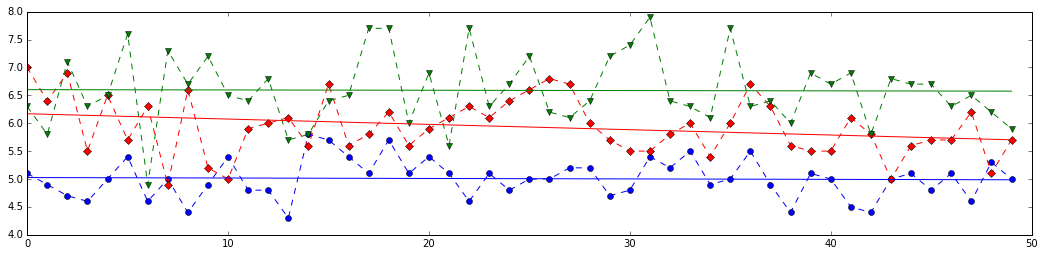

sepal width (cm)


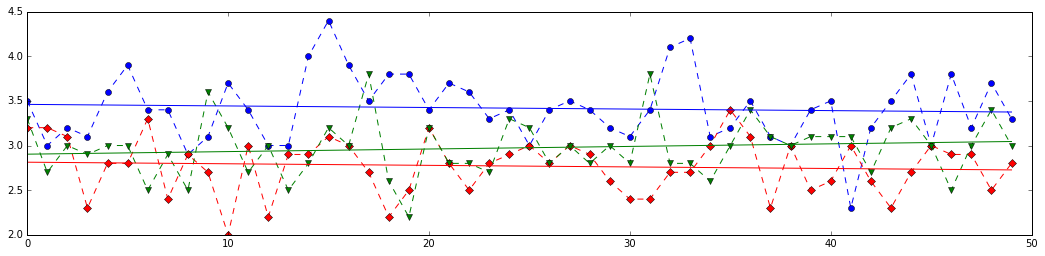

petal length (cm)


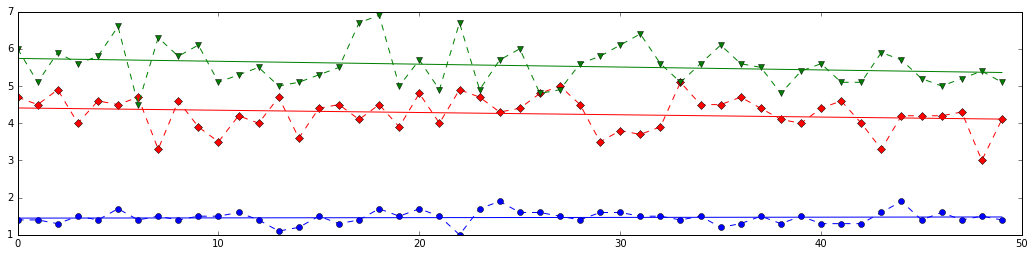

petal width (cm)


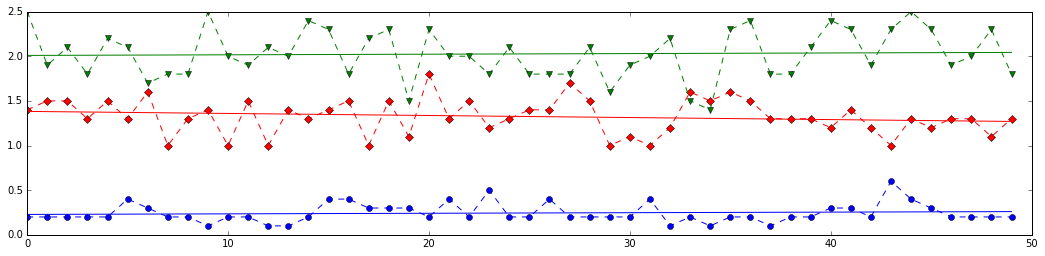

In [31]:
# Draw 4 plots for each feature of all iris kinds
plt.rcParams["figure.figsize"] = (18.0, 4.0)

def draw(col_num):
    print X.columns[col_num]
    x = np.arange(50)
    y1 = X.loc[:49, X.columns[col_num]].values       # Iris Setosa
    y2 = X.loc[50:99, X.columns[col_num]].values     # Iris Versicolor
    y3 = X.loc[100:149, X.columns[col_num]].values   # Iris Virginica

    plt.plot(x, y1, 'bo--')
    plt.plot(x, y2, 'rD--')
    plt.plot(x, y3, 'gv--')

    # Linear trendlines
    p1 = np.poly1d(np.polyfit(x, y1, 1))
    p2 = np.poly1d(np.polyfit(x, y2, 1))
    p3 = np.poly1d(np.polyfit(x, y3, 1))

    plt.plot(x, p1(x), 'b-')
    plt.plot(x, p2(x), 'r-')
    plt.plot(x, p3(x), 'g-')

    plt.show()
    
for i in range(4):
    draw(i)

In [32]:
# Based on above plots let's create an array with features values close to each iris kind 
# and with one value with is far from each class 
X_new = [
    [5.0,  3.6,  1.3,  0.25],   # very similar to the Iris Setosa
    [7.0,  3.0,  5.0,  1.5],   # very similar to the Iris Versicolor
    [6.5,  3.0,  6.2,  2.25],   # very similar to the Iris Virginica
    [3.0,  1.5,  2.5,  1.0]    # length and width parameters are far from each group
]

# The last element of `X_new` is most closest above blue (class 0) line on the first plot from the above set,
# it is almost between red (class 1) and blue line on the second plot, 
# but it is most closest to the red line on the third and fourth lines.
# Meaning, this features set should corresponds to class 1.
# Let's see which result the SVM classifier will give.

predicted = svc.predict(X_new)
# Let's look at how scikit-learn classified above four arrays. Do you remember that
# 0 corresponds to Iris Setosa
# 1 is Iris Versicolor
# 2 coincides with Iris Virginica
print predicted

#SVM Classifier have builded function `score()`, which returns the mean accuracy on the given test data and labels.
svc.score(X, Y)

[0 1 2 1]


0.99333333333333329

As you can see the results of prediction are those we discussed above. Nice work, SVM classifier!

### _Confusion matrix_:

Let's build a [**confusion matrix**](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which is a specific table layout that allows visualization of the performance of an algorithm.  

Each column of the matrix represents the instances in a predicted class while each row represents the instances in an actual class (or vice-versa). The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

Confusion matrix
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


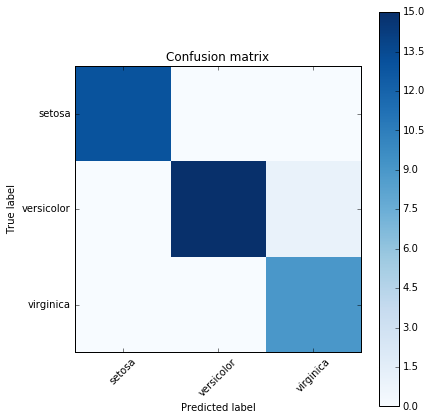

In [33]:
from sklearn.metrics import confusion_matrix

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

y_pred = svc.fit(X_train, y_train).predict(X_test)
   
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)

plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(data_iris.target_names))
plt.xticks(tick_marks, data_iris.target_names, rotation=45)
plt.yticks(tick_marks, data_iris.target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

Function [`accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) of sklearn.metrics module allows to know how often the classifier was correct.

In [34]:
from sklearn.metrics import accuracy_score

print accuracy_score(y_test, y_pred)

0.973684210526


### _ROC Curves and Area Under the Curve (AUC)_:

Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold? Sure, the ROC helps us with this. 

**ROC** (Receiver Operating Characteristic) curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-class or multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context. You can't actually see the thresholds used to generate the curve on the ROC curve itself.

More info you can find on [Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) and [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).

**AUC** is the percentage of the ROC plot that is underneath the curve. AUC is useful as a single number summary of classifier performance.

If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.

AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [35]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# We can also use directly loaded iris dataset, which contains numpy arrays
X = data_iris.data
Y = data_iris.target

# Binarize the targets
y_bin = label_binarize(Y, classes=[0, 1, 2])
print "Binarized targets:"
print y_bin[:3]
print "...\n", y_bin[50:53]
print "...\n", y_bin[100:103], "\n..."

n_classes = y_bin.shape[1]
print "Different classes of targets: ", n_classes

# shuffle and split equals training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=.5)

# Now we have three various labels. 
# OneVsRestClassifier consists in fitting one classifier per class. 
# For each classifier, the class is fitted against all the other classes.
# This is the most commonly used strategy for multiclass classification and is a fair default choice.
svc_roc = OneVsRestClassifier(SVC(kernel='linear', probability=True))
# Learn to predict each class against the other
y_score = svc_roc.fit(X_train, y_train).decision_function(X_test)

Binarized targets:
[[1 0 0]
 [1 0 0]
 [1 0 0]]
...
[[0 1 0]
 [0 1 0]
 [0 1 0]]
...
[[0 0 1]
 [0 0 1]
 [0 0 1]] 
...
Different classes of targets:  3


roc_auc:
for setosa is 1.0
for versicolor is 0.830909090909
for virginica is 0.997037037037
for micro is 0.973155555556


C:\Users\Vova\Anaconda\lib\site-packages\ipykernel\__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


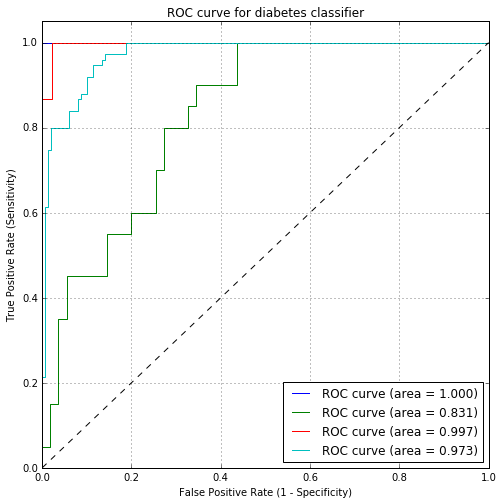

In [36]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
roc_auc_scores = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], thresholds["micro"] = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print "roc_auc:"
for key, val in roc_auc.iteritems():
    try:
        print "for {} is {}".format(data_iris.target_names[key], val)
    except:
        print "for micro is {}".format(val)
        
# Plot of a ROC curve for a specific class
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.3f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.3f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.3f)' % roc_auc[2])
plt.plot(fpr["micro"], tpr["micro"], label='ROC curve (area = %0.3f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Confusion matrix advantages:**
* Allows you to calculate a variety of metrics.
* Useful for multi-class problems (more than two response classes).

**ROC/AUC advantages:**
* Does not require you to set a classification threshold.
* Still useful when there is high class imbalance.

>### Exersice:

> In this task you need to build a model to classify images of handwritten digits, which are provided in scikit-learn datasets.
To load the digits and display 18 of the examplars you may use the following code:

> `from sklearn.datasets import load_digits`<br></br>
> `import numpy as np`<br></br><br></br>
> `digits = load_digits()`<br></br>
> `fig = plt.figure()`<br></br>
> `fig.subplots_adjust(hspace=-0.5, wspace=0.2)`<br></br>
> `for i in range(18):`<br></br>
> <span style="margin-left:4.5em"></span>`subplot = fig.add_subplot(3,6,i+1)`<br></br>
> <span style="margin-left:4.5em"></span>`subplot.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')`<br></br>
> <span style="margin-left:4.5em"></span>`# label the image with the target value`<br></br>
> <span style="margin-left:4.5em"></span>`subplot.text(0, 7, str(digits.target[i]), size=20)`<br></br>
> `plt.show()`<br></br>

> <img src="images/digits.png">

> 1\) Investigate all digits datasets keyses and look at how handwritten digits are represented there.

> 2\) Create a new linear `SVC` classifier. Select one item from digits dataset (one digit) in random way - this is the digit which you need to classify. Fit the classifier with all digits with the exception of the previously selected digit (`X` array) and respective targets (`Y` array). Predict the label of the selected digit and draw it as shown on example above. Check whether predicted label and the picture coincide.

> 3\) Use `train_test_split` function do divide whole dataset into train and test parts. Note, test part should contain 30% of items from whole dataset, then the train part will consist from 70% of digits. Build [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) model (Despite its name it is a classification algorithm, which is common used at images recognition/detection) anf fit it based on obtained train and test data. Calculate an display the accuracy of training and testing for the model.

> 4\) For the train and test data build a linear VC classifier. Construct to both of them the confusion matrix and calucate the `accuracy_score` value. Also draw ROC curves for each class from dataset (each digit) and calculate the AUC value for them. 